In [1]:
# Start writing code here...import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import tensorflow


In [2]:
from tensorflow import keras
print (keras.__version__)

2.4.0


In [3]:
print (tensorflow.version.VERSION)

2.4.1


In [4]:

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('keras-model-2/keras_model.h5')



In [5]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('keras-model-2/jbl2.jpeg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

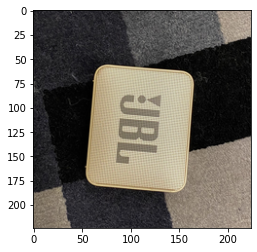

In [7]:

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
#image.show()
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [8]:
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

In [9]:
# run the inference
prediction = model.predict(data)
print(prediction)

[[0.01271059 0.98728937]]


In [10]:

# Replace this with the path to your image
image = Image.open('keras-model-2/mm1.jpeg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

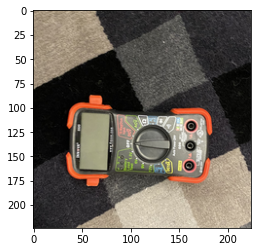

In [ ]:

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
#image.show()
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [ ]:
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

In [ ]:
# run the inference
prediction = model.predict(data)
print(prediction)

[[0.9994381  0.00056182]]


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1280)              410208    
_________________________________________________________________
sequential_3 (Sequential)    (None, 2)                 128300    
Total params: 538,508
Trainable params: 524,428
Non-trainable params: 14,080
_________________________________________________________________


In [ ]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 1280]
[None, 2]


In [ ]:
layers_flat = []
for layer in  model.layers:
    try:
        layers_flat.extend(layer.layers)
    except AttributeError:
        layers_flat.append(layer)


In [ ]:
for layer in layers_flat:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 7, 7, 1280]
[None, 1280]
[None, 100]
[None, 2]


In [ ]:
layers_flat[0].summary()

Model: "model1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 16) 432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 16) 64          Conv1[0][0]                      
_____________________________________________________________________________________________

In [ ]:
![mobilenet image](https://miro.medium.com/max/692/1*7R068tzqqK-1edu4hbAVZQ.png)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=33ff63ae-1588-4fca-8d3d-b57e3847854d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>